In [191]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [192]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [193]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [194]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [195]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

# Show the tables found in the database
print("Tables found in the database:", Base.classes.keys())

# Create a session to interact with the database
session = Session(engine)


Tables found in the database: ['measurement', 'station']


In [196]:
# Print headers (Renamed Column Names)
print("Date         | Station ID    | Precipitation  | Temperature")
print("____________________________________________________________")

# Query the first 5 rows from the Measurement table
for row in session.query(Measurement).limit(5):
    print(f"{row.date}   | {row.station}   | {row.prcp}          | {row.tobs}")


Date         | Station ID    | Precipitation  | Temperature
____________________________________________________________
2010-01-01   | USC00519397   | 0.08          | 65.0
2010-01-02   | USC00519397   | 0.0          | 63.0
2010-01-03   | USC00519397   | 0.0          | 74.0
2010-01-04   | USC00519397   | 0.0          | 76.0
2010-01-06   | USC00519397   | None          | 73.0


In [197]:
# Print headers (Renamed Column Names)
print("Station ID| Station Name")
print("__________|________________")

# Query all rows from the Station table
for row in session.query(Station).all():
    print(f"{row.id}         | {row.name}")


Station ID| Station Name
__________|________________
1         | WAIKIKI 717.2, HI US
2         | KANEOHE 838.1, HI US
3         | KUALOA RANCH HEADQUARTERS 886.9, HI US
4         | PEARL CITY, HI US
5         | UPPER WAHIAWA 874.3, HI US
6         | WAIMANALO EXPERIMENTAL FARM, HI US
7         | WAIHEE 837.5, HI US
8         | HONOLULU OBSERVATORY 702.2, HI US
9         | MANOA LYON ARBO 785.2, HI US


In [198]:
# Print headers (Renamed Column Names)
print("Date       | Station ID      | Station Name        | Precipitation  | Temperature")
print("___________________________________________________________________________________")

# Perform a join between Measurement and Station tables
for m, s in session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(5):
    print(f"{m.date}    | {m.station}  | {s.name}    | {m.prcp}       | {m.tobs}")


Date       | Station ID      | Station Name        | Precipitation  | Temperature
___________________________________________________________________________________
2010-01-01    | USC00519397  | WAIKIKI 717.2, HI US    | 0.08       | 65.0
2010-01-02    | USC00519397  | WAIKIKI 717.2, HI US    | 0.0       | 63.0
2010-01-03    | USC00519397  | WAIKIKI 717.2, HI US    | 0.0       | 74.0
2010-01-04    | USC00519397  | WAIKIKI 717.2, HI US    | 0.0       | 76.0
2010-01-06    | USC00519397  | WAIKIKI 717.2, HI US    | None       | 73.0


In [199]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [200]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [201]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [202]:
# Find the most recent date in the data set.
print(f"('{most_recent_date[0]}',)")

('2',)


In [203]:

# Step 1 and 2 Find the Most Recent Date and Calculate the Date One Year Back
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
session = Session(engine)

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
one_year_ago = str(int(most_recent_date.split("-")[0]) - 1) + most_recent_date[4:]

print(f"Most Recent Date: {most_recent_date}")
print(f"One Year Back: {one_year_ago}")

# Query to Retrieve the Last 12 Months of Precipitation Data
last_12_months_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save Query Results as a Pandas DataFrame
df = pd.DataFrame(last_12_months_data, columns=["Date", "Precipitation"])






Most Recent Date: 2017-08-23
One Year Back: 2016-08-23


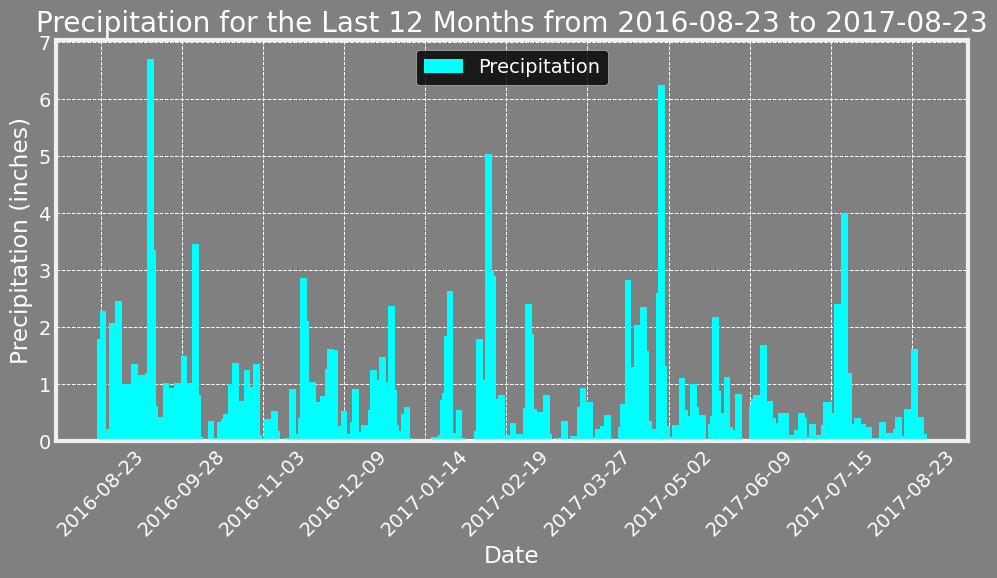

In [204]:
# Plotting the Data
plt.figure(figsize=(10, 6), facecolor='grey')  
ax = plt.gca()
ax.set_facecolor('grey')  
plt.bar(df["Date"], df["Precipitation"], width=3, label='Precipitation', color='cyan')
plt.xlabel("Date", color='white')
plt.ylabel("Precipitation (inches)", color='white')
plt.title(f"Precipitation for the Last 12 Months from {one_year_ago} to {most_recent_date}", color='white')
dates = df["Date"].unique()
plt.xticks(dates[::int(len(dates)/10)], rotation=45, color='white')
plt.yticks(color='white')
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', linewidth=0.7, color='white')
plt.legend(loc='upper center', facecolor='black', labelcolor='white')

plt.tight_layout()
plt.show()


In [205]:


import pandas as pd

# Assuming df is your DataFrame and "Precipitation" is the column of interest
# Calculate each statistic individually
count = df['Precipitation'].count()
mean = df['Precipitation'].mean()
std = df['Precipitation'].std()
min_val = df['Precipitation'].min()
q25 = df['Precipitation'].quantile(0.25)
median = df['Precipitation'].median()
q75 = df['Precipitation'].quantile(0.75)
max_val = df['Precipitation'].max()

# Print the header and formatted statistics
print("Name       |Precipitation")
print("--------------------------")
print(f"Count      |  {count:,.0f}")
print(f"Mean       |  {mean:,.2f}")
print(f"Std Devm   |  {std:,.2f}")
print(f"Min        | {min_val:,.2f}")
print(f"25th %ile  |  {q25:,.2f}")
print(f"Median     |  {median:,.2f}")
print(f"75th %ile  |  {q75:,.2f}")
print(f"Max        |  {max_val:,.2f}")


Name       |Precipitation
--------------------------
Count      |  2,021
Mean       |  0.18
Std Devm   |  0.46
Min        | 0.00
25th %ile  |  0.00
Median     |  0.02
75th %ile  |  0.13
Max        |  6.70


# Exploratory Station Analysis

In [206]:

# Calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()

# Print out the total number of stations
print(f"[({total_stations},)]")

[(9,)]


In [207]:
# Query to find the most active stations
active_stations = (session.query(Measurement.station, func.count(Measurement.station))
                           .group_by(Measurement.station)
                           .order_by(func.count(Measurement.station).desc())
                           .all())

# Print the most active stations and their counts in descending order
print("Most Active Stations in Descending order")
print("----------------------------------------")
for station, count in active_stations:
    print(f"('station: {station}', count: {count})")

Most Active Stations in Descending order
----------------------------------------
('station: USC00519281', count: 2772)
('station: USC00519397', count: 2724)
('station: USC00513117', count: 2709)
('station: USC00519523', count: 2669)
('station: USC00516128', count: 2612)
('station: USC00514830', count: 2202)
('station: USC00511918', count: 1979)
('station: USC00517948', count: 1372)
('station: USC00518838', count: 511)


In [208]:

# Query to find the lowest, highest, and average temperature for the most active station
temperature_stats = (session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
                             .filter(Measurement.station == most_active_station)
                             .all())[0]

# Print the temperature stats for the most active station
print(f"Temperature Stats for Most Active Station ({most_active_station})")
print("--------------------------------------------------------------")
print(f"Lowest Temperature:  {temperature_stats[0]:.1f}°F")
print(f"Highest Temperature: {temperature_stats[1]:.1f}°F")
print(f"Average Temperature: {temperature_stats[2]:.14f}°F")

Temperature Stats for Most Active Station (USC00519281)
--------------------------------------------------------------
Lowest Temperature:  54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66378066378067°F


In [ ]:
# Temperature stats for all stations 

In [209]:
# Using the most active station id
most_active_station = active_stations[0][0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


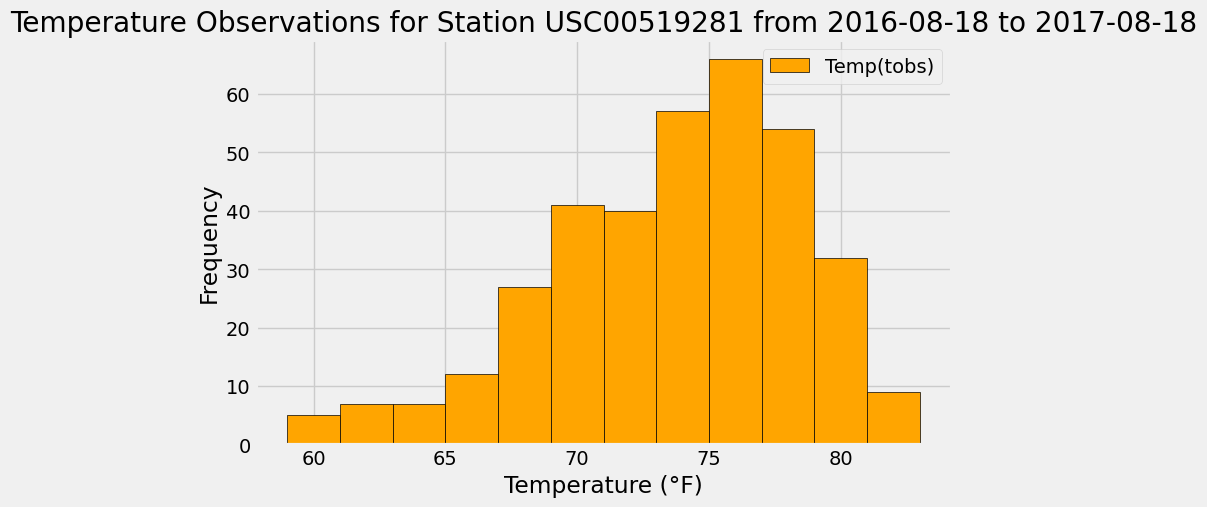

In [210]:
# Get the most recent date for the most active station
most_recent_date = session.query(Measurement.date).filter(Measurement.station == most_active_station).\
    order_by(Measurement.date.desc()).first()[0]

# Calculate date one year back from the most recent date
one_year_ago = str(int(most_recent_date.split("-")[0]) - 1) + most_recent_date[4:]

# Query last 12 months of temperature data for the most active station
last_12_months_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

# Create a DataFrame from the query result
df = pd.DataFrame(last_12_months_data, columns=['Temperature'])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Temperature'], bins=12, color='orange', edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station} from {one_year_ago} to {most_recent_date}')
plt.legend(['Temp(tobs)'])
plt.show()

# Close Session

In [211]:
# Close Session
session.close()